In [4]:
import pandas as pd


# Load dataset
df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip')

# View basic info
print("Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)

# Check for null values
print("\nMissing Values:\n", df.isnull().sum())

# Preview first 5 rows
df.head()


Shape: (568454, 10)

Column Types:
 Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Missing Values:
 Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# Drop rows with missing Text or Score
df_clean = df.dropna(subset=['Text', 'Score'])

df_clean['Score'] = df_clean['Score'].astype(int)

# Create sentiment labels
def map_sentiment(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df_clean['Sentiment'] = df_clean['Score'].apply(map_sentiment)

# Final cleaned DataFrame (we'll use only Text + Sentiment for now)
df_final = df_clean[['Text', 'Sentiment']]

# Show class distribution
print(df_final['Sentiment'].value_counts())
df_final.head()


Sentiment
positive    443777
negative     82037
neutral      42640
Name: count, dtype: int64


,Text,Sentiment
0,I have bought several of the Vitality canned d...,positive
1,Product arrived labeled as Jumbo Salted Peanut...,negative
2,This is a confection that has been around a fe...,positive
3,If you are looking for the secret ingredient i...,negative
4,Great taffy at a great price. There was a wid...,positive


/tmp/ipython-input-2881521183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['text_length_char'] = df_final['Text'].apply(len)
/tmp/ipython-input-2881521183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['text_length_words'] = df_final['Text'].apply(lambda x: len(x.split()))


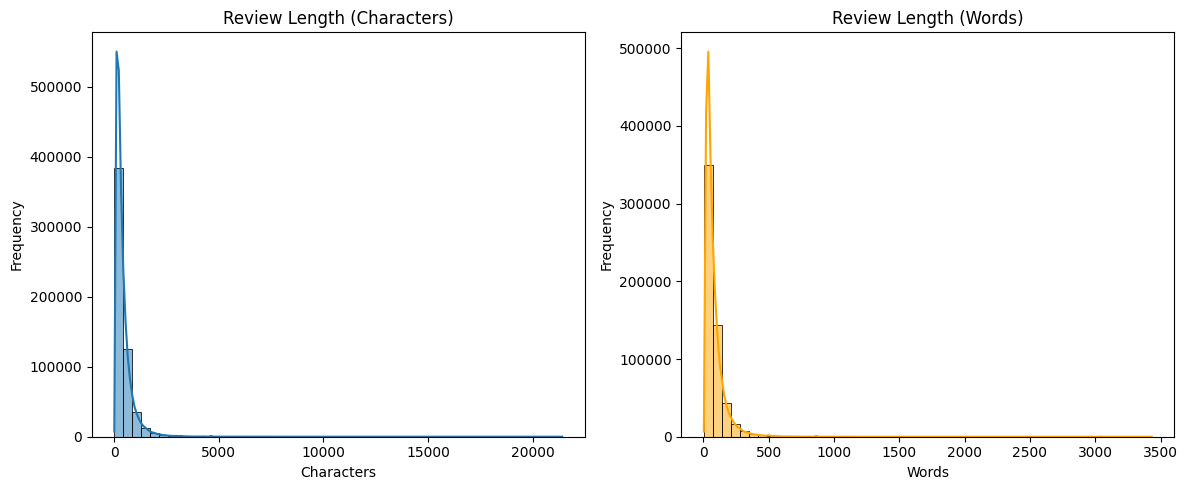

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add columns for review length
df_final['text_length_char'] = df_final['Text'].apply(len)
df_final['text_length_words'] = df_final['Text'].apply(lambda x: len(x.split()))

# Plot histograms
plt.figure(figsize=(12, 5))

# Characters
plt.subplot(1, 2, 1)
sns.histplot(data=df_final, x='text_length_char', bins=50, kde=True)
plt.title('Review Length (Characters)')
plt.xlabel('Characters')
plt.ylabel('Frequency')

# Words
plt.subplot(1, 2, 2)
sns.histplot(data=df_final, x='text_length_words', bins=50, kde=True, color='orange')
plt.title('Review Length (Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


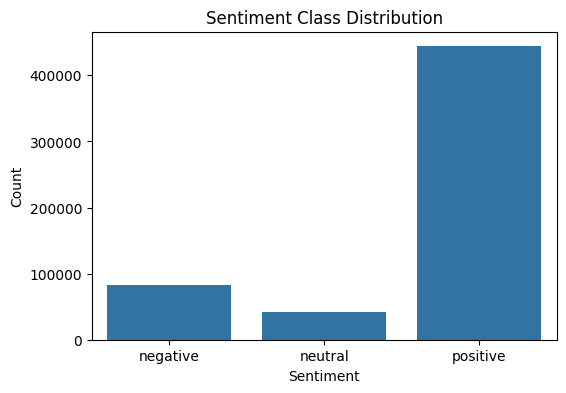

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_final, x='Sentiment', order=['negative', 'neutral', 'positive'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-2449108307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Score'] = df_clean['Score']
/tmp/ipython-input-2449108307.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['length_bucket'] = pd.cut(df_final['text_length_words'], bins=[0, 50, 100, 150, 200, 500, 1000, np.inf])
/tmp/ipython-input-2449108307.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

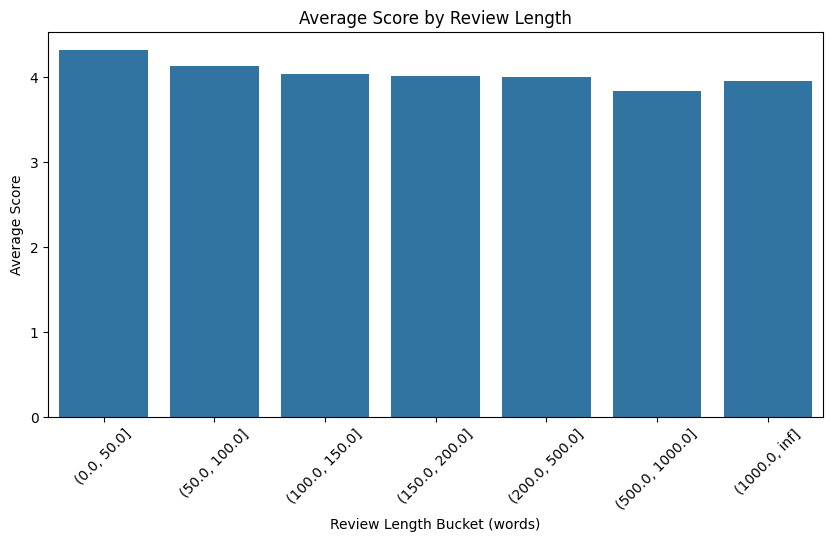

In [8]:
import numpy as np

# Bring back Score column
df_final['Score'] = df_clean['Score']

# Group by length buckets
df_final['length_bucket'] = pd.cut(df_final['text_length_words'], bins=[0, 50, 100, 150, 200, 500, 1000, np.inf])
length_scores = df_final.groupby('length_bucket')['Score'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=length_scores, x='length_bucket', y='Score')
plt.title('Average Score by Review Length')
plt.xlabel('Review Length Bucket (words)')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


NLTK-Based Classical NLP Preprocessing

In [9]:
import nltk
import os

# Set a fixed path and ensure directory exists
nltk_path = "/content/nltk_data"
os.makedirs(nltk_path, exist_ok=True)
nltk.data.path.append(nltk_path)

# Re-download resources to that path
nltk.download('punkt', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)
nltk.download('averaged_perceptron_tagger', download_dir=nltk_path)


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /content/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
!pip install -U spacy

# Download the English model
!python -m spacy download en_core_web_sm

# Load SpaCy
import spacy
nlp = spacy.load("en_core_web_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 130.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
# Sample review
sample_text = df_final.iloc[0]['Text']

# Process text
doc = nlp(sample_text)

# Extract tokens (no stopwords or punct)
tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]

# Lemmas
lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# POS tags
pos_tags = [(token.text, token.pos_) for token in doc if not token.is_punct]

# Show results
print("Original Text:\n", sample_text)
print("\nTokens:\n", tokens)
print("\nLemmas:\n", lemmas)
print("\nPOS Tags:\n", pos_tags[:15])  # limit to 15 for readability


Original Text:
 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Tokens:
 ['bought', 'Vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'Labrador', 'finicky', 'appreciates', 'product', 'better', ' ']

Lemmas:
 ['buy', 'Vitality', 'can', 'dog', 'food', 'product', 'find', 'good', 'quality', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'well', 'Labrador', 'finicky', 'appreciate', 'product', 'well', ' ']

POS Tags:
 [('I', 'PRON'), ('have', 'AUX'), ('bought', 'VERB'), ('several', 'ADJ'), ('of', 'ADP'), ('the', 'DET'), ('Vitality', 'PROPN'), ('canned', 'VERB'), ('dog', 'NOUN'), ('food', 'NOUN'), ('products', 'NOUN'), ('and', 'CCONJ'), ('have', 'AUX'), ('found'

In [12]:
def extract_adj_noun_phrases(text):
    doc = nlp(text)
    pairs = []
    for i in range(len(doc) - 1):
        # Look for pattern: ADJ followed by NOUN
        if doc[i].pos_ == "ADJ" and doc[i+1].pos_ == "NOUN":
            pairs.append(f"{doc[i].text} {doc[i+1].text}")
    return pairs


In [13]:
sample_text = df_final.iloc[0]['Text']
adj_noun_phrases = extract_adj_noun_phrases(sample_text)

print("Extracted Opinion Phrases:\n", adj_noun_phrases)


Extracted Opinion Phrases:
 ['good quality']


In [14]:
from collections import Counter

# Choose how many reviews you want to process (e.g., 1000)
N = 1000

# Initialize counters
positive_phrases = Counter()
neutral_phrases = Counter()
negative_phrases = Counter()

# Loop through first N rows
for _, row in df_final.iloc[:N].iterrows():
    phrases = extract_adj_noun_phrases(row['Text'])
    if row['Sentiment'] == 'positive':
        positive_phrases.update(phrases)
    elif row['Sentiment'] == 'neutral':
        neutral_phrases.update(phrases)
    elif row['Sentiment'] == 'negative':
        negative_phrases.update(phrases)

# Show top 10 opinion phrases in each class
print("\n Top Positive Opinion Phrases:")
print(positive_phrases.most_common(10))

print("\n Top Neutral Opinion Phrases:")
print(neutral_phrases.most_common(10))

print("\n Top Negative Opinion Phrases:")
print(negative_phrases.most_common(10))



 Top Positive Opinion Phrases:
[('local grocery', 15), ('hot sauce', 14), ('other brands', 13), ('great product', 11), ('good quality', 10), ('high quality', 10), ('other flavors', 10), ('great price', 9), ('first time', 9), ('sweet potatoes', 9)]

 Top Neutral Opinion Phrases:
[('brown rice', 5), ('sweet potato', 3), ('first time', 3), ('organic carrots', 3), ('sweet potatoes', 3), ('better deal', 2), ('other spices', 2), ('next time', 2), ('higher molasses', 2), ('organic integrity', 2)]

 Top Negative Opinion Phrases:
[('sour cream', 6), ('other brands', 3), ('brown chips', 3), ('new food', 2), ('good buy', 2), ('good thing', 2), ('same time', 2), ('full refund', 2), ('plastic container', 2), ('few days', 2)]


In [15]:
!pip install -q transformers datasets accelerate


In [16]:
# Choose sample size per class based on smallest class
sample_size = df_final['Sentiment'].value_counts().min()  # You can also hardcode to 200 for faster testing

# Sample equally from each sentiment class
df_balanced = df_final.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(sample_size, random_state=42))

# Map sentiment labels to integers
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df_balanced['label'] = df_balanced['Sentiment'].map(label_map)

# Check result
print(df_balanced['Sentiment'].value_counts())
print(df_balanced.head())


Sentiment
negative    42640
neutral     42640
positive    42640
Name: count, dtype: int64
                                                     Text Sentiment  \
525327  I have an absolute passion for deep, dark hot ...  negative   
75760   This drink is so "super energy" it's almost fr...  negative   
468100  I'm sticking with what used to be carnation, n...  negative   
71864   Aspertame causes alot of problems including pr...  negative   
211592  I ordered these because my local pet store sto...  negative   

        text_length_char  text_length_words  Score   length_bucket  label  
525327               582                104      2  (100.0, 150.0]      0  
75760                244                 40      2     (0.0, 50.0]      0  
468100               119                 22      2     (0.0, 50.0]      0  
71864                615                109      1  (100.0, 150.0]      0  
211592               279                 48      2     (0.0, 50.0]      0  


/tmp/ipython-input-1652689515.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_final.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(sample_size, random_state=42))


In [17]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize the reviews
X = list(df_balanced['Text'])
y = list(df_balanced['label'])

# Tokenize with padding & truncation
encodings = tokenizer(X, truncation=True, padding=True, max_length=256)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load tiny BERT model & tokenizer
tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny")
model = AutoModelForSequenceClassification.from_pretrained("prajjwal1/bert-tiny", num_labels=3)


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
X = list(df_balanced['Text'])
y = list(df_balanced['label'])

encodings = tokenizer(X, truncation=True, padding=True, max_length=128)


model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

In [20]:
import torch
from torch.utils.data import Dataset

class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

dataset = ReviewDataset(encodings, y)

# Train-test split
from sklearn.model_selection import train_test_split
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])


In [21]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=20,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)


In [22]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: abhiramraghunathan (abhiramraghunathan-bsbi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,1.092700
20,1.098200
30,1.097500
40,1.097000
50,1.090100
60,1.086200
70,1.080400
80,1.076900
90,1.089500
100,1.055000


TrainOutput(global_step=12792, training_loss=0.7137950702271587, metrics={'train_runtime': 228.4238, 'train_samples_per_second': 896.019, 'train_steps_per_second': 56.001, 'total_flos': 65028558127104.0, 'train_loss': 0.7137950702271587, 'epoch': 2.0})

In [23]:
# Get raw predictions
preds_output = trainer.predict(val_dataset)

# Get predicted label IDs
preds = preds_output.predictions.argmax(axis=1)

# True labels
true = preds_output.label_ids


In [24]:
from sklearn.metrics import classification_report, accuracy_score

# Metrics
acc = accuracy_score(true, preds)
print(f"Accuracy: {acc:.4f}")

# Classification report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(true, preds, target_names=target_names))


Accuracy: 0.7227
              precision    recall  f1-score   support

    negative       0.75      0.70      0.72      8543
     neutral       0.62      0.69      0.66      8513
    positive       0.81      0.78      0.80      8528

    accuracy                           0.72     25584
   macro avg       0.73      0.72      0.72     25584
weighted avg       0.73      0.72      0.72     25584



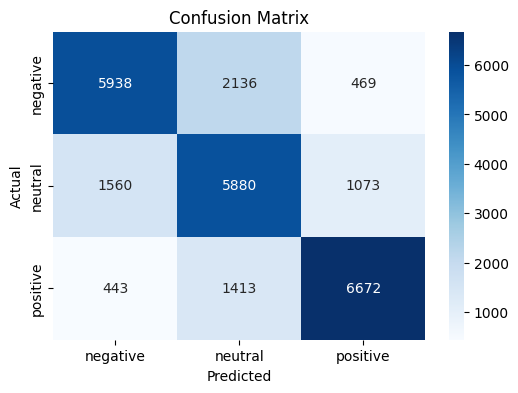

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true, preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
import numpy as np
import pandas as pd
import re
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# ---------- 1) Get predictions on the validation split ----------
pred_out = trainer.predict(val_dataset)
logits = pred_out.predictions
pred_ids = logits.argmax(axis=1)
true_ids = pred_out.label_ids

# Get softmax confidences
def softmax(x, axis=1):
    x = x - x.max(axis=axis, keepdims=True)
    e = np.exp(x)
    return e / e.sum(axis=axis, keepdims=True)
probs = softmax(logits)

# Rebuild validation texts/labels from indices (Subset preserves order)
val_indices = val_dataset.indices  # indices into original dataset order
val_texts = [X[i] for i in val_indices]
val_true = [y[i] for i in val_indices]

# Sanity check ordering
assert len(val_texts) == len(true_ids) == len(pred_ids)

# ---------- 2) Build analysis DataFrame ----------
inv_label_map = {v:k for k,v in label_map.items()}

def word_len(t):
    return len(re.findall(r"\b\w+\b", t))

NEGATION_RE = re.compile(r"\b(no|not|never|nothing|nowhere|hardly|barely|scarcely|isn\'t|aren\'t|wasn\'t|weren\'t|don\'t|doesn\'t|didn\'t|can\'t|couldn\'t|won\'t|wouldn\'t|shouldn\'t|haven\'t|hasn\'t|hadn\'t|ain\'t|n't)\b", re.IGNORECASE)
SARCASM_RE = re.compile(r'\b(yeah right|as if|sure|totally|what a joke)\b|\/s|\blol\b|\bsmh\b', re.IGNORECASE)
EMOJI_RE = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF]')  # basic emoji ranges

def caps_ratio(t):
    letters = [c for c in t if c.isalpha()]
    if not letters: return 0.0
    return sum(1 for c in letters if c.isupper()) / len(letters)

df_eval = pd.DataFrame({
    "text": val_texts,
    "true_id": true_ids,
    "pred_id": pred_ids,
    "true": [inv_label_map[i] for i in true_ids],
    "pred": [inv_label_map[i] for i in pred_ids],
    "conf": probs.max(axis=1),
    "len_words": [word_len(t) for t in val_texts],
    "has_negation": [bool(NEGATION_RE.search(t)) for t in val_texts],
    "exclam_count": [t.count("!") for t in val_texts],
    "caps_ratio": [caps_ratio(t) for t in val_texts],
    "has_sarcasm": [bool(SARCASM_RE.search(t)) for t in val_texts],
    "has_emoji": [bool(EMOJI_RE.search(t)) for t in val_texts],
    # Simple domain keywords (food dataset still varies nicely)
    "is_pet": [bool(re.search(r'\b(dog|cat|puppy|kitten|labrador|pet)\b', t, re.I)) for t in val_texts],
    "is_coffee": [bool(re.search(r'\b(coffee|espresso|caffeine|latte)\b', t, re.I)) for t in val_texts],
    "is_candy": [bool(re.search(r'\b(candy|taffy|chocolate|sweets|sweet)\b', t, re.I)) for t in val_texts],
})

# Length buckets
df_eval["len_bucket"] = pd.cut(
    df_eval["len_words"],
    bins=[0, 30, 80, np.inf],
    labels=["short(<=30)", "medium(31-80)", "long(>80)"],
    include_lowest=True
)

# ---------- 3) Helper: compute metrics for a boolean mask ----------
def slice_metrics(mask, name):
    idx = np.where(mask)[0]
    if len(idx) == 0:
        return {"slice": name, "n": 0, "acc": np.nan, "p_macro": np.nan, "r_macro": np.nan, "f1_macro": np.nan}
    y_true = df_eval.loc[idx, "true_id"].to_numpy()
    y_pred = df_eval.loc[idx, "pred_id"].to_numpy()
    acc = accuracy_score(y_true, y_pred)
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="macro", zero_division=0)
    return {"slice": name, "n": len(idx), "acc": acc, "p_macro": p, "r_macro": r, "f1_macro": f1}

# ---------- 4) Evaluate important slices ----------
slices = []

# a) Length slices
for lbl in ["short(<=30)", "medium(31-80)", "long(>80)"]:
    slices.append(slice_metrics(df_eval["len_bucket"] == lbl, f"length={lbl}"))

# b) Negation present vs absent
slices.append(slice_metrics(df_eval["has_negation"], "negation=present"))
slices.append(slice_metrics(~df_eval["has_negation"], "negation=absent"))

# c) Emphasis: ALL-CAPS heavy, many exclamations, emojis
slices.append(slice_metrics(df_eval["caps_ratio"] >= 0.2, "caps_ratio>=0.2"))
slices.append(slice_metrics(df_eval["exclam_count"] >= 2, "exclam>=2"))
slices.append(slice_metrics(df_eval["has_emoji"], "has_emoji"))

# d) Sarcasm heuristic
slices.append(slice_metrics(df_eval["has_sarcasm"], "sarcasm_heuristic"))

# e) Domain keywords
slices.append(slice_metrics(df_eval["is_pet"], "domain=pet"))
slices.append(slice_metrics(df_eval["is_coffee"], "domain=coffee"))
slices.append(slice_metrics(df_eval["is_candy"], "domain=candy"))

metrics_df = pd.DataFrame(slices).sort_values(by=["slice"]).reset_index(drop=True)
print("=== Slice Metrics (macro-averaged) ===")
display(metrics_df)

# ---------- 5) Show representative failure cases per slice ----------
def show_failures(mask, k=5, want="FN/FP"):
    sub = df_eval[mask & (df_eval["true_id"] != df_eval["pred_id"])].copy()
    if sub.empty:
        print("No failures for this slice.")
        return
    # Sort by high confidence wrong predictions (model was confident but wrong)
    sub["margin"] = sub["conf"]
    sub = sub.sort_values(by="margin", ascending=False).head(k)
    cols = ["true", "pred", "conf", "len_words", "text"]
    display(sub[cols])

print("\n--- Failures: NEGATION present (most common pitfall) ---")
show_failures(df_eval["has_negation"], k=6)

print("\n--- Failures: Sarcasm heuristic ---")
show_failures(df_eval["has_sarcasm"], k=6)

print("\n--- Failures: Short reviews (<=30 words) ---")
show_failures(df_eval["len_bucket"] == "short(<=30)", k=6)

print("\n--- Failures: CAPS-heavy or many exclamations ---")
show_failures((df_eval["caps_ratio"] >= 0.2) | (df_eval["exclam_count"] >= 2), k=6)

# Optional: aggregate per-class F1 by slice (example: length buckets)
def per_class_f1_by_slice(slice_mask, name):
    from sklearn.metrics import classification_report
    idx = np.where(slice_mask)[0]
    if len(idx) == 0:
        print(f"\nNo examples for {name}")
        return
    y_true = df_eval.loc[idx, "true_id"].to_numpy()
    y_pred = df_eval.loc[idx, "pred_id"].to_numpy()
    print(f"\n=== Per-class report for {name} ===")
    print(classification_report(y_true, y_pred, target_names=["negative","neutral","positive"], zero_division=0))

per_class_f1_by_slice(df_eval["has_negation"], "negation=present")
per_class_f1_by_slice(df_eval["len_bucket"] == "short(<=30)", "short reviews")


=== Slice Metrics (macro-averaged) ===


,slice,n,acc,p_macro,r_macro,f1_macro
0,caps_ratio>=0.2,229,0.724891,0.682555,0.687115,0.674458
1,domain=candy,3522,0.703010,0.712356,0.701400,0.705214
2,domain=coffee,3660,0.729235,0.738825,0.726576,0.730758
3,domain=pet,2586,0.692962,0.698446,0.693267,0.694639
4,exclam>=2,3232,0.772896,0.706862,0.698166,0.700560
5,has_emoji,0,NaN,NaN,NaN,NaN
6,length=long(>80),10011,0.672261,0.685519,0.670379,0.675653
7,length=medium(31-80),11439,0.745083,0.743987,0.742314,0.742660
8,length=short(<=30),4134,0.783019,0.768517,0.767570,0.767605
9,negation=absent,6706,0.787205,0.750372,0.741940,0.745443



--- Failures: NEGATION present (most common pitfall) ---


,true,pred,conf,len_words,text
5255,negative,positive,0.975921,16,"These are VERY CLEAN, and just don't have that..."
12695,neutral,positive,0.975063,90,"The service was excellent from Amazon,it alway..."
12857,neutral,positive,0.975063,90,"The service was excellent from Amazon,it alway..."
13751,neutral,positive,0.975063,90,"The service was excellent from Amazon,it alway..."
12154,negative,positive,0.974551,42,I love eating them and they are good for watch...
13926,negative,positive,0.974239,618,"My girlfriend and I have been rescuing, foster..."



--- Failures: Sarcasm heuristic ---


,true,pred,conf,len_words,text
12083,negative,positive,0.974239,615,"My girlfriend and I have been rescuing, foster..."
13926,negative,positive,0.974239,618,"My girlfriend and I have been rescuing, foster..."
4803,negative,positive,0.961832,216,I'll say for starters that I am a caffeine jun...
17802,neutral,positive,0.961694,246,It stinks having to adhere to a gluten-free di...
11621,negative,positive,0.960303,544,This is one of my favorite Life Savers flavors...
7011,neutral,positive,0.954943,69,"Well, I like it. Everyone is different. I'm ..."



--- Failures: Short reviews (<=30 words) ---


,true,pred,conf,len_words,text
5255,negative,positive,0.975921,16,"These are VERY CLEAN, and just don't have that..."
17981,neutral,positive,0.975385,20,delicious delicious! delicious delicious! Fast...
5400,neutral,positive,0.974959,27,This is delicious and enjoyed by others that I...
15097,neutral,positive,0.974614,30,Mmmm! great to take with you. I keep a couple...
13570,neutral,positive,0.973996,20,This is a wonderful product; we tried the Rais...
21664,negative,positive,0.973248,27,Green tea is a favorite for me and to find it ...



--- Failures: CAPS-heavy or many exclamations ---


,true,pred,conf,len_words,text
5255,negative,positive,0.975921,16,"These are VERY CLEAN, and just don't have that..."
4777,neutral,positive,0.975874,62,"That said, they are the best tasting things ar..."
1469,neutral,positive,0.975874,62,"That said, they are the best tasting things ar..."
17981,neutral,positive,0.975385,20,delicious delicious! delicious delicious! Fast...
13751,neutral,positive,0.975063,90,"The service was excellent from Amazon,it alway..."
12857,neutral,positive,0.975063,90,"The service was excellent from Amazon,it alway..."



=== Per-class report for negation=present ===
              precision    recall  f1-score   support

    negative       0.75      0.70      0.72      7054
     neutral       0.62      0.70      0.66      6866
    positive       0.76      0.70      0.73      4958

    accuracy                           0.70     18878
   macro avg       0.71      0.70      0.70     18878
weighted avg       0.71      0.70      0.70     18878


=== Per-class report for short reviews ===
              precision    recall  f1-score   support

    negative       0.77      0.73      0.75      1210
     neutral       0.66      0.70      0.68      1151
    positive       0.88      0.87      0.88      1773

    accuracy                           0.78      4134
   macro avg       0.77      0.77      0.77      4134
weighted avg       0.79      0.78      0.78      4134



In [27]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0;

In [28]:
!python -m spacy download en_core_web_md

import spacy
nlp = spacy.load("en_core_web_md")

# Example similarities
print("Similarity (good vs bad):", nlp("good").similarity(nlp("bad")))
print("Similarity (coffee vs tea):", nlp("coffee").similarity(nlp("tea")))
print("Similarity (dog vs cat):", nlp("dog").similarity(nlp("cat")))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 21.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Similarity (good vs bad): 0.9999999403953552
Similarity (coffee vs tea): 0.570783793926239
Similarity (dog vs cat): 0.9999999403953552


In [29]:
!pip install torchtext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.3 MB/s eta 0:00:00


In [30]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Similarities
print("good vs bad:", nlp("good").similarity(nlp("bad")))
print("coffee vs tea:", nlp("coffee").similarity(nlp("tea")))
print("dog vs cat:", nlp("dog").similarity(nlp("cat")))


good vs bad: 0.8144330382347107
coffee vs tea: 0.7156691551208496
dog vs cat: 0.7422727346420288


/tmp/ipython-input-3187617423.py:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print("good vs bad:", nlp("good").similarity(nlp("bad")))
/tmp/ipython-input-3187617423.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or u

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
from numpy.linalg import norm

# Use a small sample of reviews
sample_texts = df_final['Text'].dropna().sample(3000, random_state=42).tolist()

# Bag-of-words co-occurrence
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(sample_texts)

# Reduce dimensions to create embeddings (100d)
svd = TruncatedSVD(n_components=100, random_state=42)
word_vectors = svd.fit_transform(X.T)

# Map vocab to embeddings
vocab = vectorizer.get_feature_names_out()
embeddings = {word: word_vectors[i] for i, word in enumerate(vocab)}

# Cosine similarity function
def cosine_similarity(w1, w2):
    if w1 not in embeddings or w2 not in embeddings:
        return None
    v1, v2 = embeddings[w1], embeddings[w2]
    return np.dot(v1, v2) / (norm(v1) * norm(v2))

# Test similarities
print("good vs bad:", cosine_similarity("good", "bad"))
print("coffee vs tea:", cosine_similarity("coffee", "tea"))
print("dog vs cat:", cosine_similarity("dog", "cat"))


good vs bad: 0.25754786979492367
coffee vs tea: 0.0478602055444275
dog vs cat: -0.003550485945936334


In [32]:
def analogy(a, b, c, topn=1):
    if a not in embeddings or b not in embeddings or c not in embeddings:
        return None
    vec = embeddings[a] - embeddings[b] + embeddings[c]
    sims = {}
    for word, v in embeddings.items():
        if word in [a, b, c]:
            continue
        sims[word] = np.dot(vec, v) / (norm(vec) * norm(v))
    return sorted(sims.items(), key=lambda x: x[1], reverse=True)[:topn]

print("king - man + woman =", analogy("king", "man", "woman"))
print("paris - france + italy =", analogy("paris", "france", "italy"))


king - man + woman = None
paris - france + italy = [('splurge', np.float64(0.3556283741565772))]


In [33]:
from sklearn.model_selection import train_test_split

X = df_balanced['Text']
y = df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Build pipeline
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

Accuracy: 0.7547
Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.75      0.76      8528
     neutral       0.68      0.70      0.69      8528
    positive       0.82      0.82      0.82      8528

    accuracy                           0.75     25584
   macro avg       0.76      0.75      0.76     25584
weighted avg       0.76      0.75      0.76     25584

ROC-AUC: 0.9019


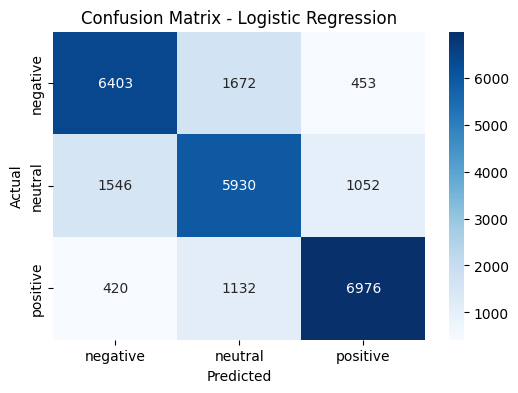

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = lr_pipeline.predict(X_test)
y_probs = lr_pipeline.predict_proba(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=['negative','neutral','positive'])
)

# ROC-AUC (macro)
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
